# Classificador de Imagens de Covid -  Módulo de Aprendizado de Máquina

In [ ]:
# !git clone https://github.com/itallogravina/deepcovid.git



fatal: destination path 'deepcovid' already exists and is not an empty directory.


In [ ]:
### 1. Importando as Dependências

In [ ]:

import numpy as np 
import pandas as pd
import os
import cv2
import pickle
import keras
from tqdm import tqdm
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D


### 2. Verificando Presença de uma GPU
O código abaixo realiza uma breve vericação no computador que está executando o código, vendo se este possui placa gráfica que esteja disponível para uso, caso haja, ele usará a mesma para o treinamento do modelo de dados, caso contrário, ele fará uso do processador da máquina para tal.

In [ ]:
!pwd
tf
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices())
#???

/content
Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 3. Tratamento dos dados, utilizando visão computacional
Nesta função utlizamos o OpenCV, uma biblioteca de visão computacional, onde fazemos uso da função cvtColor(), função essa que converte uma imagem de um espaço de cores para outro. Também redimensionamos a imagem pra 100x100p, após fazer o carregamento desta. 

In [ ]:
def load_rand():
    X=[]
    dir_path='/content/deepcovid/archive/dataset/train' #Diretorio dos dados de treinamento
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir) #rottenoranges vs freshoranges
        print(path_main)
        i=0
        for img_name in os.listdir(path_main): 
            print(img_name)
            if i>=12: #Read 18 images each directory (36 in total)
                break
            img=cv2.imread(os.path.join(path_main,img_name)) #read image
            img=cv2.resize(img,(150,150)) #resize image 250x250 pixels
            X.append(img)
            i+=1
    return X

X=load_rand()

  0%|          | 0/3 [00:00<?, ?it/s]

NORMAL
/content/deepcovid/archive/dataset/train/NORMAL
IM-0248-0001.jpeg
NORMAL2-IM-1100-0001.jpeg
NORMAL2-IM-0580-0001.jpeg
IM-0612-0001-0001.jpeg
NORMAL2-IM-1114-0001.jpeg
NORMAL2-IM-1102-0001-0002.jpeg
IM-0511-0001-0001.jpeg
NORMAL2-IM-0915-0001.jpeg
IM-0553-0001-0001.jpeg
NORMAL2-IM-0868-0001.jpeg


100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

NORMAL2-IM-1304-0001.jpeg
IM-0164-0001.jpeg
NORMAL2-IM-0894-0001.jpeg
PNEUMONIA
/content/deepcovid/archive/dataset/train/PNEUMONIA
person480_virus_981.jpeg
person368_bacteria_1667.jpeg
person503_bacteria_2125.jpeg
person487_bacteria_2057.jpeg
person716_bacteria_2617.jpeg
person1510_virus_2628.jpeg
person1401_bacteria_3555.jpeg
person489_bacteria_2063.jpeg
person568_bacteria_2359.jpeg
person846_virus_1491.jpeg
person852_virus_1497.jpeg
person333_bacteria_1540.jpeg
person551_bacteria_2311.jpeg
Covid
/content/deepcovid/archive/dataset/train/Covid
COVID-2071.png
COVID-3596.png
COVID-1235.png
COVID-3390.png
COVID-719.png
COVID-1522.png
COVID-2437.png
COVID-2065.png
COVID-2360.png
COVID-2786.png
COVID-3455.png
COVID-3592.png
COVID-1631.png


In [ ]:
X=np.array(X)
X.shape 

(36, 150, 150, 3)

Carrega as imagens e coloca labels para elas

## Raio-x Bom

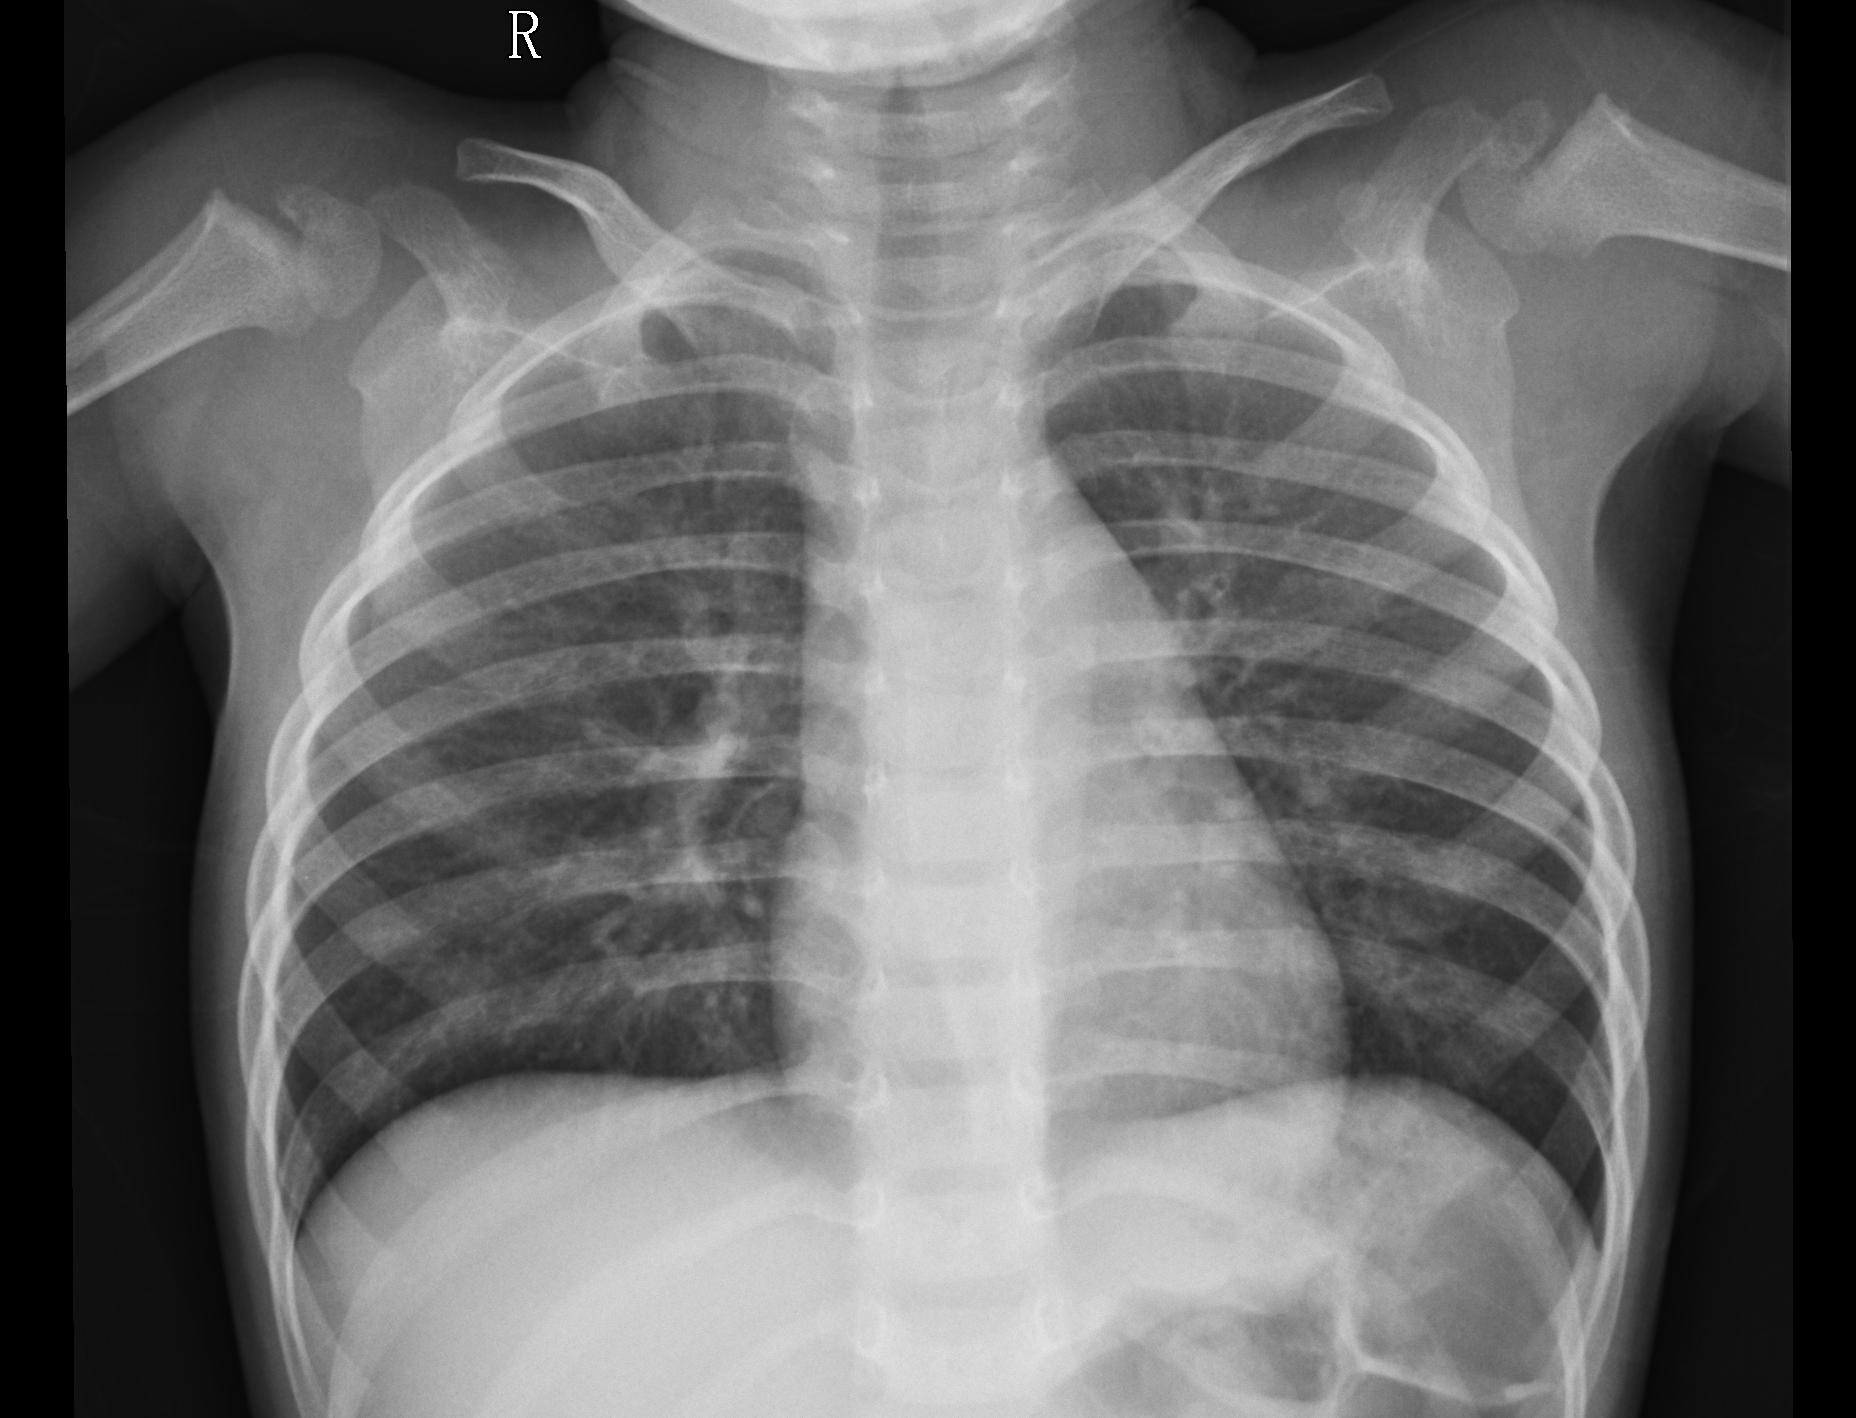

In [ ]:
from IPython.display import Image
Image(filename='/content/deepcovid/archive/dataset/test/NORMAL/NORMAL2-IM-0027-0001.jpeg', width=255) 


## Raio-x com pneumonia

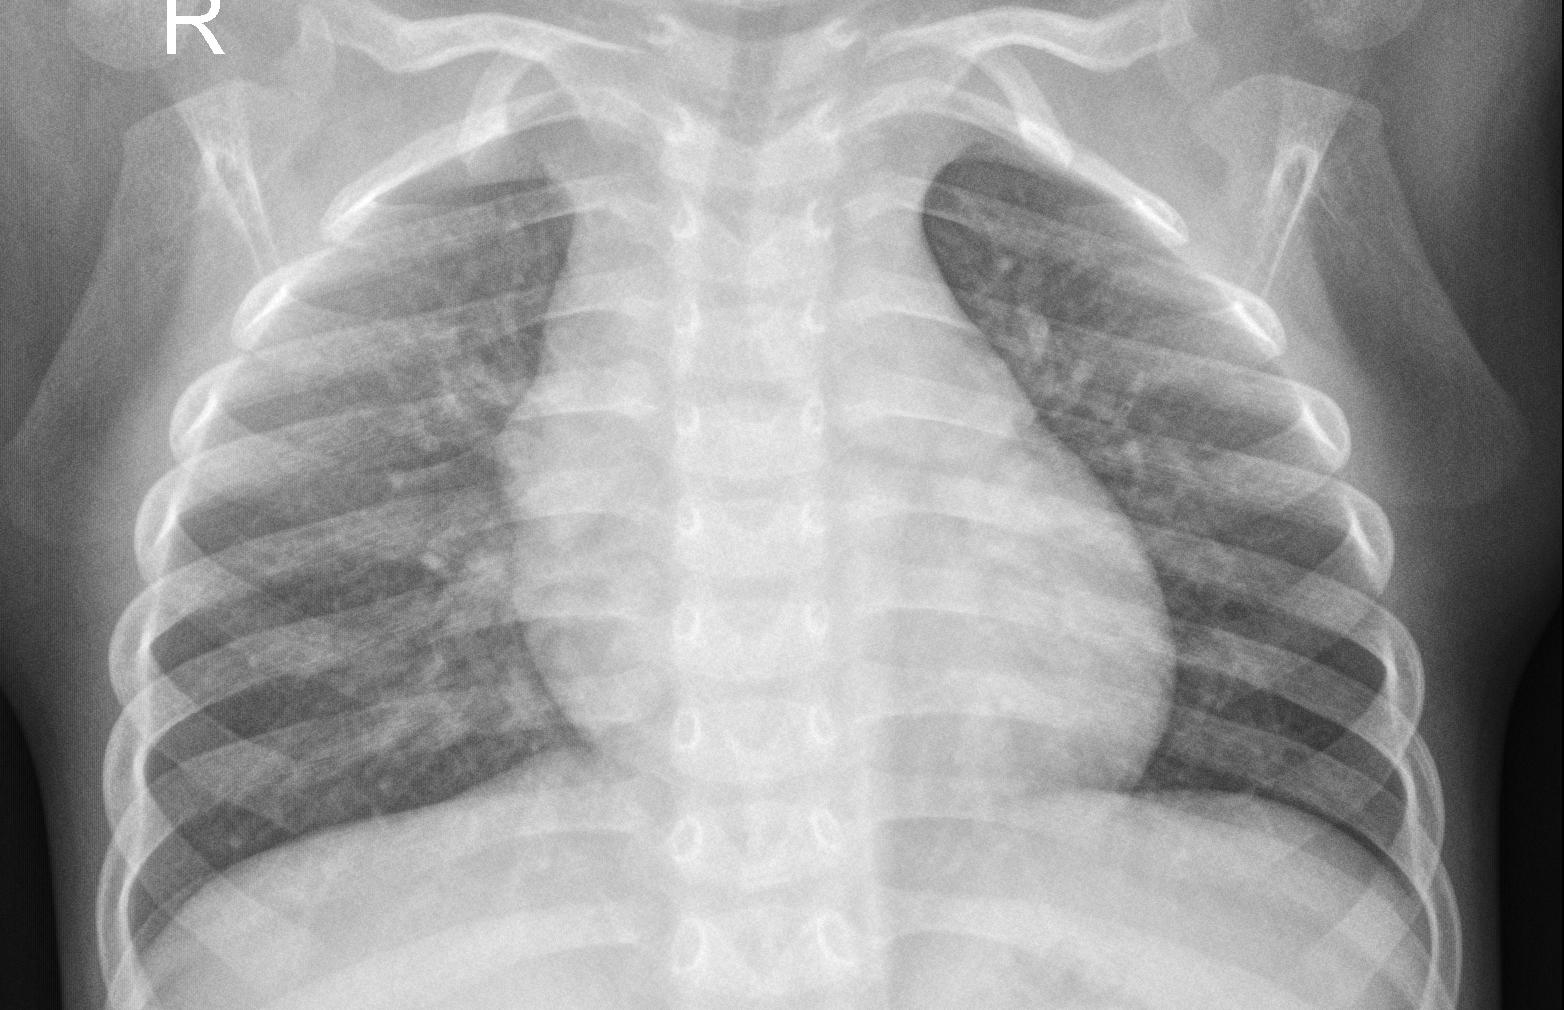

In [ ]:
from IPython.display import Image
Image(filename='/content/deepcovid/archive/dataset/test/NORMAL/NORMAL2-IM-0271-0001.jpeg', width=255) 

## Raio-x com Covid

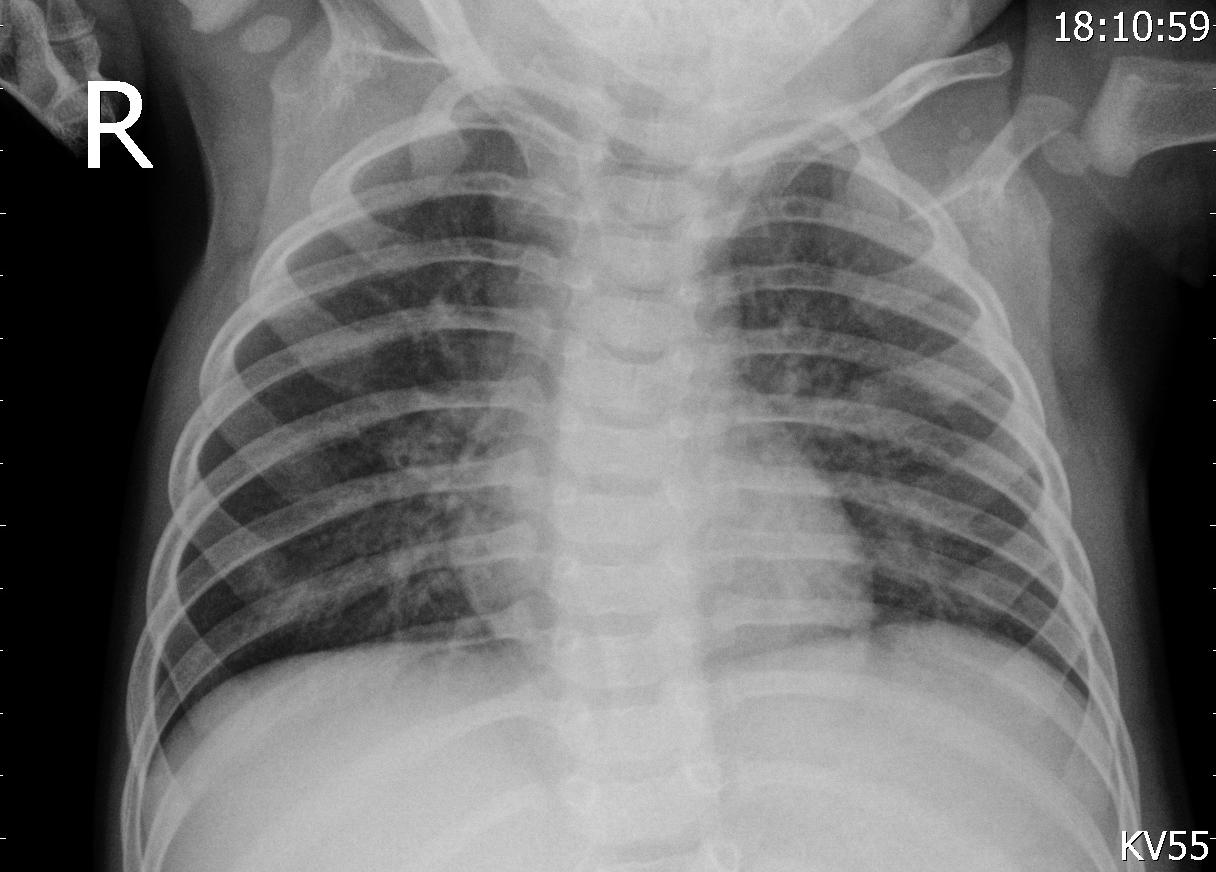

In [ ]:
from IPython.display import Image
Image(filename='/content/deepcovid/archive/dataset/test/PNEUMONIA/person28_virus_62.jpeg', width=255) 

## Construindo e iniciando a CNN

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Passo 2 - Agrupamento
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Passo 3 - Flattening
classifier.add(Flatten())

# Passo 4 - Conetando tudo
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilando a rede
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Treinamento
Treinamento da rede com 3 diferentes tipos de imagens ``Com covid``, ``Com pneumonia`` e ``Sem nada``

Fiz o uso de duas funções para melhor desempenho ao vizualizar a imagens 

    ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
    ret3, img = cv2.threshold  (img, 0,250, cv2.THRESH_BINARY  + cv2.THRESH_OTSU)



In [ ]:
def load_rottenvsfresh():
    
    quality=['fresh', 'rotten', 'less']
    
    X,Y=[],[]
    z=[]
    #Sem nada -> LABEL 0
    #Com covid -> LABEL 1
    #Com pneumonia -> LABEL 2
    for cata in tqdm(os.listdir('/content/deepcovid/archive/dataset/train')):
        print(cata)
        if quality[0] in cata:
            path_main=os.path.join('/content/deepcovid/archive/dataset/train/NORMAL',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
                z.append([img,0]) #fresh
        elif quality[1] in cata:
            path_main=os.path.join('/content/deepcovid/archive/dataset/train/Covid',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
                z.append([img,1]) #rotten
        else:
            path_main=os.path.join('/content/deepcovid/archive/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
                z.append([img,2]) #less
    
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X,Y=load_rottenvsfresh()


  0%|          | 0/3 [00:00<?, ?it/s]

NORMAL


 33%|███▎      | 1/3 [00:31<01:02, 31.42s/it]

PNEUMONIA


 67%|██████▋   | 2/3 [01:01<00:30, 30.96s/it]

Covid


100%|██████████| 8832/8832 [00:00<00:00, 1293845.58it/s]


In [ ]:
Y=np.array(Y)
X=np.array(X)
y_ser=pd.Series(Y)
y_ser.value_counts()

2    8832
dtype: int64

In [ ]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten', 'less']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/content/deepcovid/archive/dataset/test')):
        if quality[0] in cata:
            path_main=os.path.join('/content/deepcovid/archive/dataset/test/NORMAL',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('/content/deepcovid/archive/dataset/test/Covid',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
                z.append([img,1]) #rotten
        else:
            path_main=os.path.join('/content/deepcovid/archive/dataset/test/',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
                z.append([img,2]) #less
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)        
    return X,Y

In [ ]:
X_val,Y_val=load_rottenvsfresh_valset()


100%|██████████| 4240/4240 [00:00<00:00, 1154120.90it/s]


In [ ]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

2    4240
dtype: int64

 ### 0. Criando e estruturando da Rede Neural
 Foi definido o modelo como um modelo Sequencial. O modelo sequencial é um modelo que se sobresai quando se trata de uma pilha de camadas simples, tendo cada camada exatamento um tensor de entrada e outro de saída.
 


In [ ]:
#Para construir o modelo, precisamos criar a arquitetura usando Sequential().
model = Sequential()

#Em seguida, adicionamos a primeira camada, uma camada de convolução para extrair 
#recursos da imagem de entrada e criamos 32 recursos convolutos 3 x 3 ReLu, 
#também conhecidos como mapas de recursos. Como esta é a primeira camada, devemos inserir a forma 
#da dimensão que é uma imagem de 100 x 100 pixels com profundidade = 3 (RGB).
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', 
                 activation='relu', input_shape=(100,100,3)))

model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))

#A próxima camada será uma camada de pooling com um filtro de 2 x 2 pixels para obter o 
#elemento máximo dos mapas de feições. Isso reduz a dimensão dos mapas de recursos pela metade e 
#também é conhecido como subamostragem.
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

#Crie mais uma camada de convolução e camada de agrupamento como antes, mas sem o input_shape.
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
#Adicione uma camada de achatamento para reduzir a imagem a uma matriz linear, 
#também conhecida como um vetor de dimensão única, para alimentar e conectar-se à rede neural.
model.add(Flatten())
# model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))
#Agora crie uma rede neural onde a primeira camada tem 128 neurônios e a função de ativação ReLu .
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#Adicione uma camada de drop out com 30% de drop out.
model.add(Dropout(0.3))
#Crie a última camada desta rede neural usando a função softmax .
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 32)      1344      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 64)       

In [ ]:

lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=2, mode='max',
    min_lr=0.00002, cooldown=2)

check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='./rottenvs fresh.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

#compile o modelo, binary_crossentropy pois sao apenas 2 classes, otimizador adam e a precisao do modelo como metrica
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [ ]:

X=X/255.0
X_val=X_val/255.0

history=model.fit(X,Y,batch_size=100,validation_data=(X_val,Y_val),epochs= 100,
                 callbacks=[check_point])

Epoch 1/100
89/89 [==============================] - 32s 261ms/step - loss: 0.0929 - accuracy: 0.9799 - val_loss: 165.7265 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 165.72652, saving model to ./rottenvs fresh.h5
Epoch 2/100
89/89 [==============================] - 22s 250ms/step - loss: 0.0112 - accuracy: 0.9993 - val_loss: 221.7939 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 165.72652
Epoch 3/100
89/89 [==============================] - 22s 251ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 228.0569 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 165.72652
Epoch 4/100
89/89 [==============================] - 23s 255ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 201.3807 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 165.72652
Epoch 5/100
89/89 [==============================] - 22s 253ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 153.2364 - val_accura

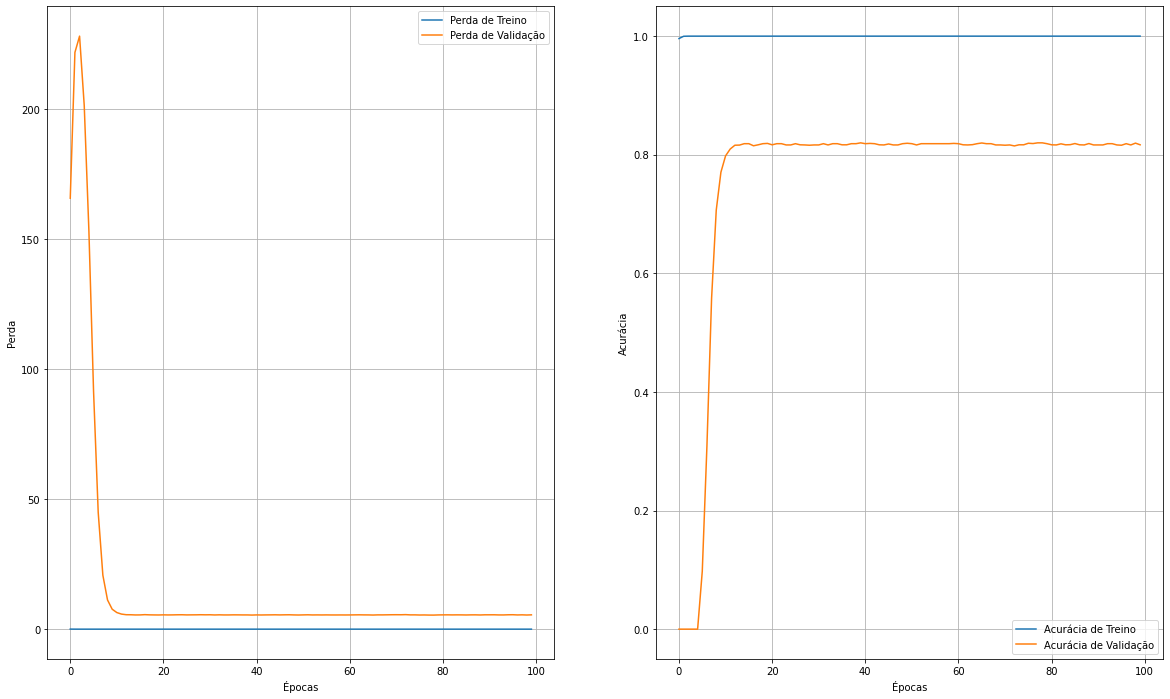

In [ ]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.plot( history.history["loss"], label = "Perda de Treino")
plt.plot( history.history["val_loss"], label = "Perda de Validação")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.plot( history.history["accuracy"], label = "Acurácia de Treino")
plt.plot( history.history["val_accuracy"], label = "Acurácia de Validação")
plt.grid(True)
plt.legend()

In [ ]:
model.save('./rottenvsfresh.h5')

In [ ]:
new_model=load_model('./rottenvsfresh.h5')

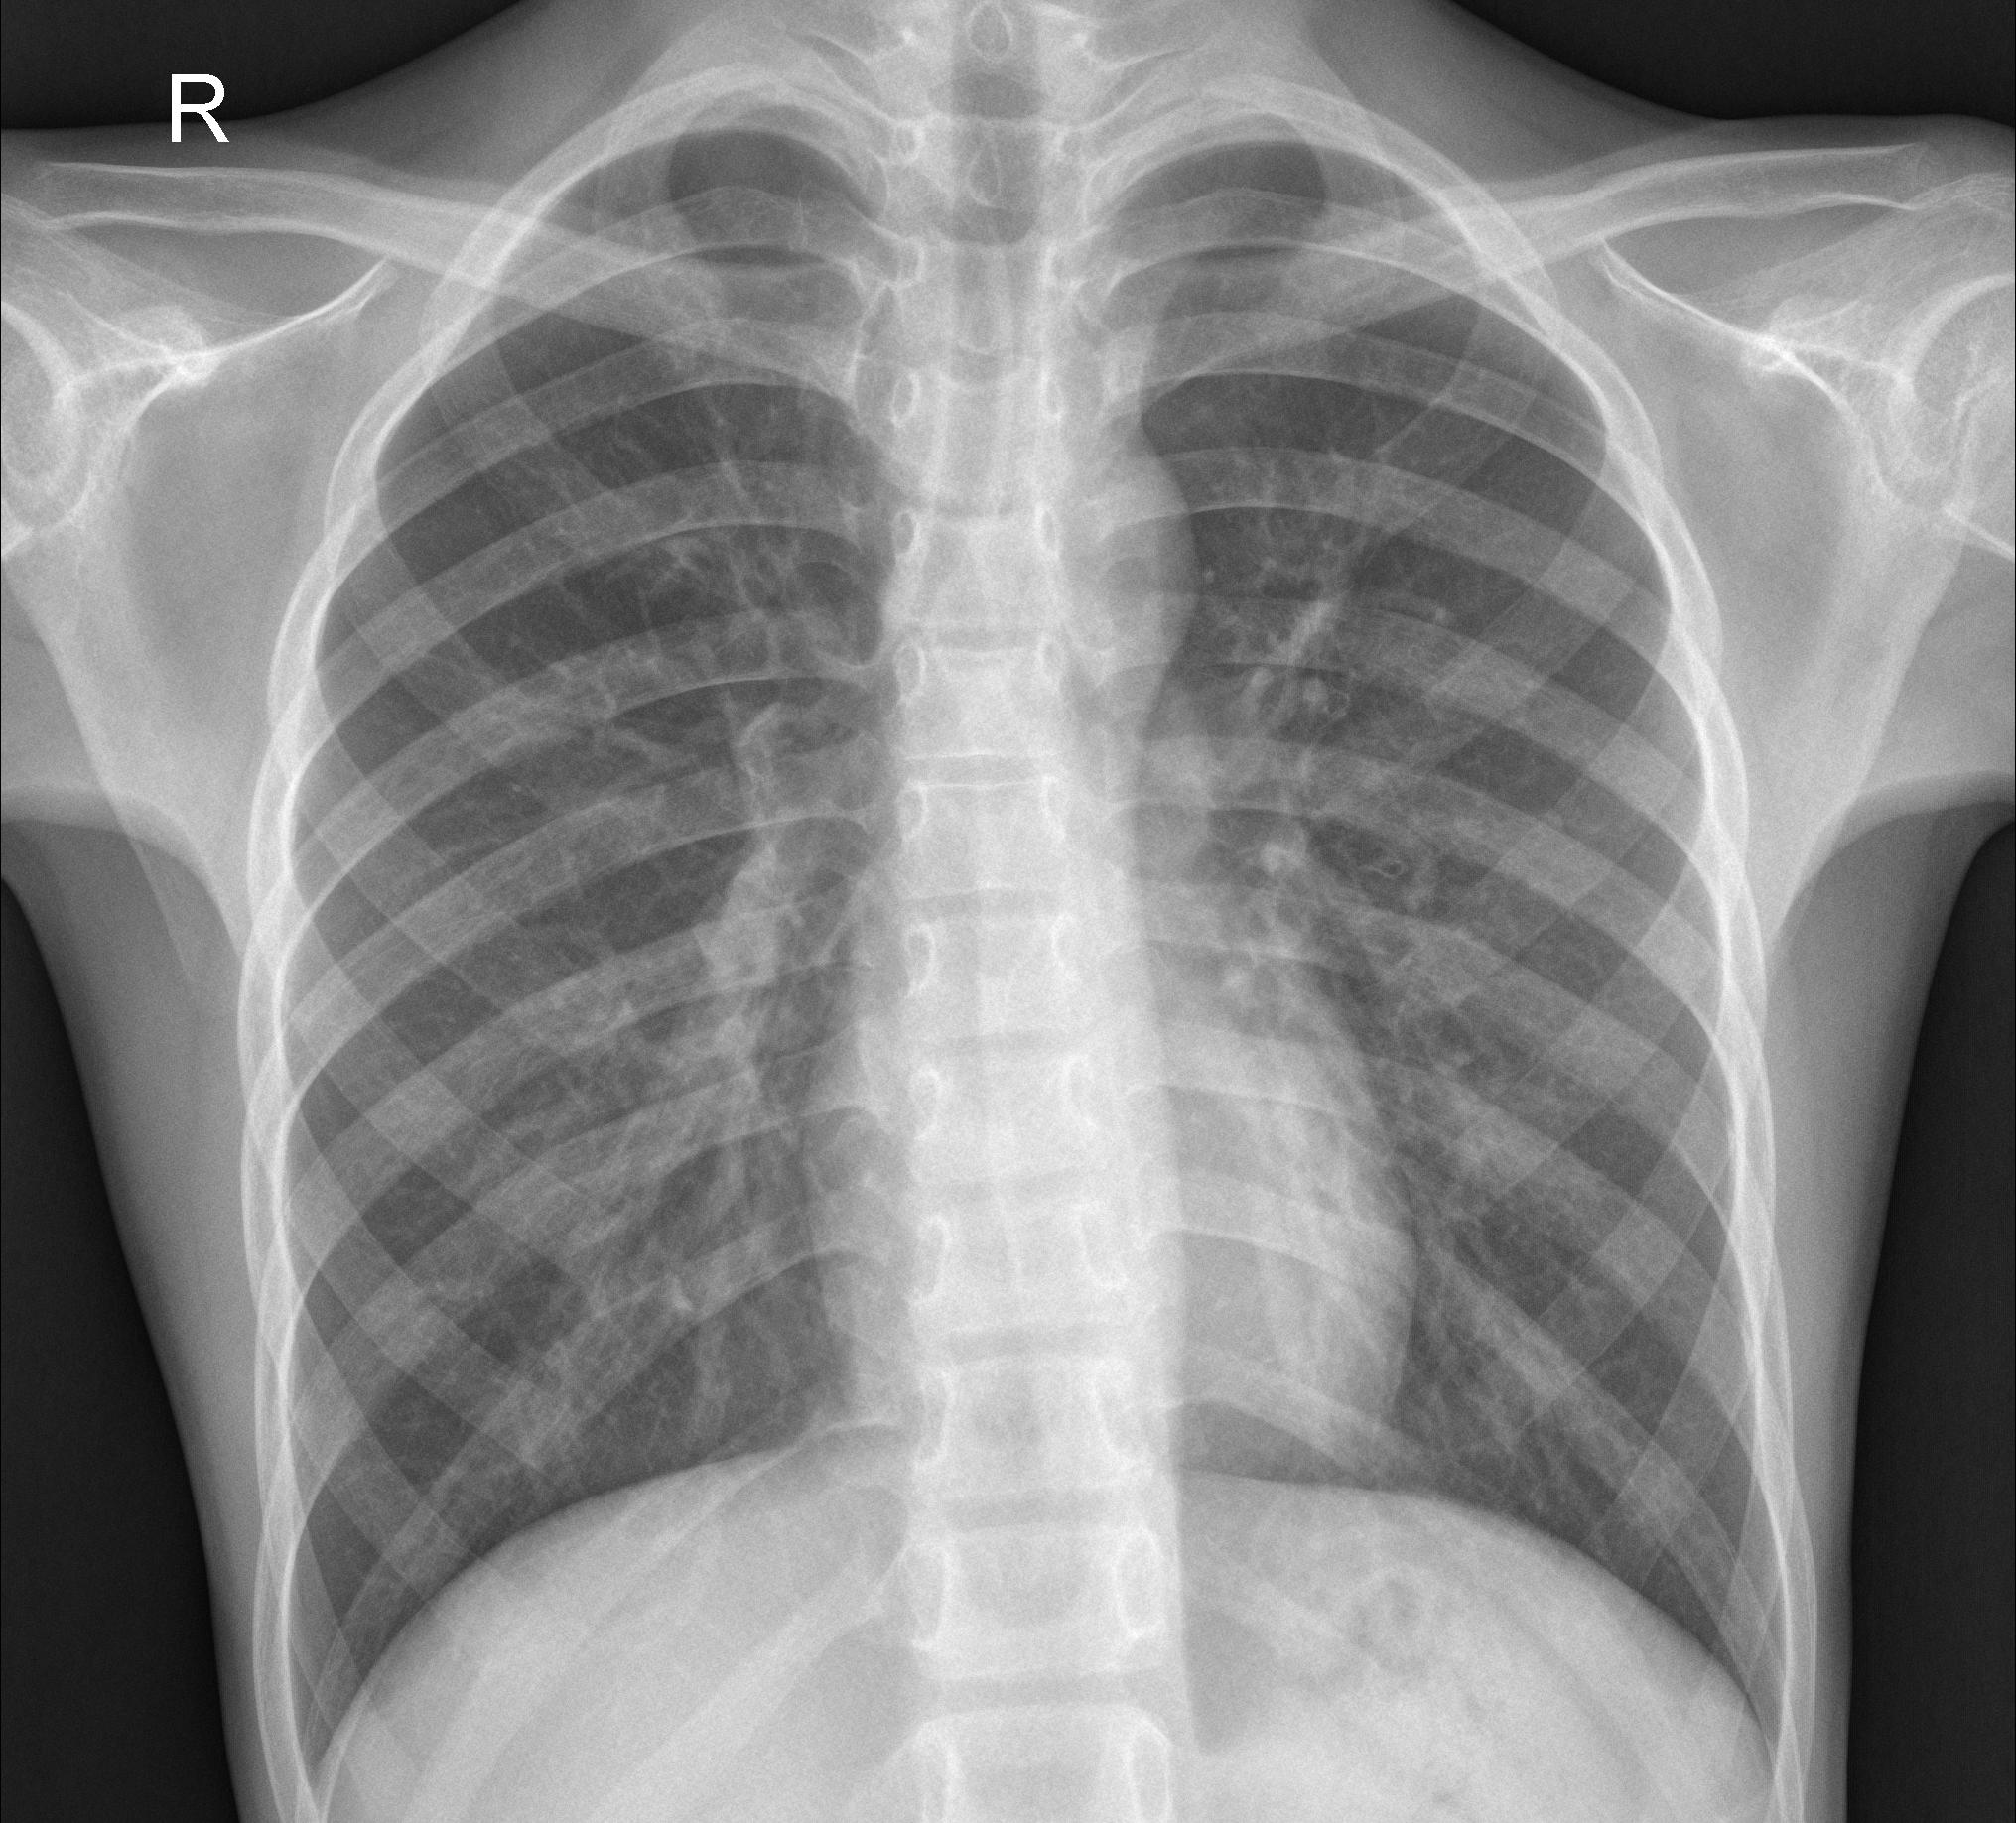

In [ ]:
from IPython.display import Image
Image(filename='/content/deepcovid/archive/dataset/test/NORMAL/IM-0005-0001.jpeg', width=255) 

In [ ]:
I = []
img=cv2.imread('/content/deepcovid/archive/dataset/test/NORMAL/IM-0005-0001.jpeg')
img=cv2.resize(img,(100,100))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

ret, img = cv2.threshold(img, 170, 200, cv2.THRESH_TOZERO)
I.append(img)
NP_ARRAY = np.array(I)
X_VAL = NP_ARRAY/255.0
R = new_model.predict_classes(X_VAL)
if(R[0]==0):
    print('Pulmão sem manchas')
if(R[0]==1):
    print('Com Covid')
if(R[0]==2):
    print('Com pneumonia')
print(R[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Com pneumonia
2


In [ ]:
res = new_model.evaluate(X_val,Y_val, return_dict = True)

133/133 [==============================] - 2s 11ms/step - loss: 5.4995 - accuracy: 0.8167
